In [12]:
import os
import shutil

# Path to the folder that contains player directories (source folder)
source_dir = "data_cricketers"

# Path to the new dataset folder where empty directories will be created (target folder)
target_dir = "data_test"

# Create the target folder if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Iterate over all directories in the source folder
for player_name in os.listdir(source_dir):
    player_dir = os.path.join(source_dir, player_name)
    
    # Check if it's a directory (and not a file)
    if os.path.isdir(player_dir):
        # Create the corresponding directory in the target folder
        new_player_dir = os.path.join(target_dir, player_name)
        os.makedirs(new_player_dir, exist_ok=True)

print(f"Empty directories created in {target_dir}!")


Empty directories created in data_test!


Result: [True]


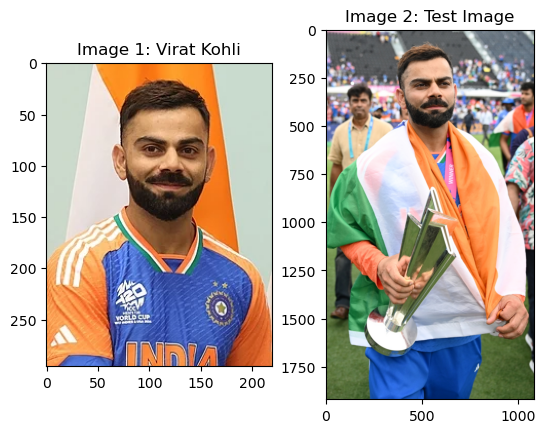

In [15]:
import cv2
import face_recognition
import matplotlib.pyplot as plt

# Load the first image
img1 = cv2.imread("Virat_Kohli_in_PMO_New_Delhi.jpg")
rgb_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Encode the first image
img_encoding1 = face_recognition.face_encodings(rgb_img1)[0]

# Load the second image
img2 = cv2.imread("vir.jpg")
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Encode the second image
img_encoding2 = face_recognition.face_encodings(rgb_img2)[0]

# Compare the faces
result = face_recognition.compare_faces([img_encoding1], img_encoding2)
print("Result:", result)

# Display images using matplotlib
plt.subplot(1, 2, 1)
plt.imshow(rgb_img1)
plt.title("Image 1: Virat Kohli")

plt.subplot(1, 2, 2)
plt.imshow(rgb_img2)
plt.title("Image 2: Test Image")

plt.show()


In [9]:
data_dir = 'data_cricketers'

In [10]:
import os
import cv2
import face_recognition
import numpy as np
import pickle

# Function to create face encodings for all players in the dataset
def create_face_encodings(data_dir):
    face_encodings = {}
    
    # Loop through each player directory
    for player_name in os.listdir(data_dir):
        player_dir = os.path.join(data_dir, player_name)
        
        if os.path.isdir(player_dir):  # Ensure it's a directory
            encodings = []
            
            # Loop through each image file in the player's directory
            for img_name in os.listdir(player_dir):
                img_path = os.path.join(player_dir, img_name)
                img = cv2.imread(img_path)
                
                if img is not None:
                    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                    # Get face encodings
                    face_encoding = face_recognition.face_encodings(rgb_img)
                    
                    if face_encoding:  # Check if any encoding is found
                        encodings.append(face_encoding[0])
            
            if encodings:
                # Average the encodings for the player to get a single representation
                face_encodings[player_name] = np.mean(encodings, axis=0)

    # Save the encodings to a file
    with open('face_encodings.pkl', 'wb') as f:
        pickle.dump(face_encodings, f)

    return face_encodings

# Path to the dataset directory
data_dir = 'data_cricketers'  # Change this to your dataset path
encodings = create_face_encodings(data_dir)

# Print out the encodings
print("Generated Face Encodings:")
for name, encoding in encodings.items():
    print(f"{name}: {encoding[:10]}...")  # Print first 10 values for brevity


KeyboardInterrupt: 